## Cardiac Catheterization: Descriptive Statistics on Distal Radial Artery usage

### Set up processing environment

In [1]:

# use print only as a function
from __future__ import print_function
import sys
#sys.version
#pd.show_versions()


# ## Create the environment

import warnings
warnings.filterwarnings('ignore')


__author__ = 'swe03'

import numpy as np
import pandas as pd
import pandas.io.gbq as pdg
#import matplotlib.pylab as plt
#import matplotlib.pyplot as pplt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.mlab as mlab

from decimal import *
import re     ## This is for regular expressions

import statsmodels.tsa as tsa

from statsmodels.tsa.stattools import ccf 
from statsmodels.graphics.api import qqplot
from statsmodels.tsa.base import datetools
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMA

from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  


from sklearn.metrics import mean_squared_error

from scipy.stats.stats import pearsonr
from scipy import stats
from sklearn import linear_model

get_ipython().magic(u'matplotlib inline')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from datetime import datetime, timedelta
import datetime as dt

 

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [2]:
#!pip install pandasql

In [3]:
from pandasql import PandaSQL 
pdsql = PandaSQL()

### Section on Extract, Transformations, Load (ETL)

In [4]:
selection = 1
if selection == 1:
    dfx1 = pd.read_csv('/Users/swe03/Documents/CathStudy/Cath Study wo dups.csv')
    dfx2 = pd.read_csv('/Users/swe03/Documents/CathStudy/Cath Study w dups.csv')

In [5]:
dfx1['gender'] = dfx1['gender'].map(lambda x: x.strip())
dfx2['gender'] = dfx2['gender'].map(lambda x: x.strip())

In [6]:
Age_All = pdsql("""Select avg(age) as Mean_Age_All from dfx1""", locals()) 
Age_All

,Mean_Age_All
0,63.424779


In [7]:
Age_STD = dfx1.age.std()

In [8]:
dfx1.age.describe()

count    113.000000
mean      63.424779
std       10.922458
min       36.000000
25%       56.000000
50%       65.000000
75%       72.000000
max       89.000000
Name: age, dtype: float64

In [9]:
AS_Ratio_All = pdsql("""Select avg("A/S ratio DRA") as Mean_AS_Ratio_All from dfx2""", locals()) 

AS_Ratio_All

,Mean_AS_Ratio_All
0,0.921519


In [10]:
dfx2["A/S ratio DRA"].describe()

count    79.000000
mean      0.921519
std       0.178793
min       0.500000
25%       0.800000
50%       0.900000
75%       1.000000
max       1.400000
Name: A/S ratio DRA, dtype: float64

In [11]:
AS_Ratio_Gender_male = pdsql("""Select gender, avg("A/S ratio DRA") as Mean_AS_Ratio_Gender 
                        from dfx2
                        where gender = 'male' """, locals()) 

AS_Ratio_Gender_male

,gender,Mean_AS_Ratio_Gender
0,male,0.95


In [12]:
AS_Ratio_Gender_male = dfx2.loc[dfx2["gender"] == 'male']
AS_Ratio_male_desc = AS_Ratio_Gender_male["A/S ratio DRA"].describe()
AS_Ratio_male_desc.count

<bound method Series.count of count    62.000000
mean      0.950000
std       0.167675
min       0.600000
25%       0.900000
50%       0.900000
75%       1.075000
max       1.400000
Name: A/S ratio DRA, dtype: float64>

In [13]:
AS_RatioLT1_Gender_male = AS_Ratio_Gender_male.loc[AS_Ratio_Gender_male["A/S ratio DRA"] < 1]
AS_RatioLT1_male_desc = AS_RatioLT1_Gender_male["A/S ratio DRA"].describe()
AS_RatioLT1_male_desc.count

<bound method Series.count of count    33.000000
mean      0.827273
std       0.100849
min       0.600000
25%       0.800000
50%       0.900000
75%       0.900000
max       0.900000
Name: A/S ratio DRA, dtype: float64>

In [14]:
AS_Ratio_male_LT1_Pct = np.divide(AS_RatioLT1_male_desc['count'], AS_Ratio_male_desc['count'])
AS_Ratio_male_LT1_Pct

0.532258064516129

In [15]:
AS_Ratio_Gender_female = dfx2.loc[dfx2["gender"] == 'female']
AS_Ratio_female_desc = AS_Ratio_Gender_female["A/S ratio DRA"].describe()
AS_Ratio_female_desc.count

<bound method Series.count of count    17.000000
mean      0.817647
std       0.184510
min       0.500000
25%       0.700000
50%       0.800000
75%       0.900000
max       1.100000
Name: A/S ratio DRA, dtype: float64>

In [16]:
AS_RatioLT1_Gender_female =  AS_Ratio_Gender_female.loc[AS_Ratio_Gender_female["A/S ratio DRA"] < 1]
AS_RatioLT1_female_desc = AS_RatioLT1_Gender_female["A/S ratio DRA"].describe()
AS_RatioLT1_female_desc.count

<bound method Series.count of count    13.000000
mean      0.738462
std       0.126085
min       0.500000
25%       0.700000
50%       0.700000
75%       0.800000
max       0.900000
Name: A/S ratio DRA, dtype: float64>

In [17]:
AS_Ratio_female_LT1_Pct = np.divide(AS_RatioLT1_female_desc['count'], AS_Ratio_female_desc['count'])
AS_Ratio_female_LT1_Pct

0.76470588235294112

In [18]:
AS_Ratio_female = AS_Ratio_Gender_female["A/S ratio DRA"]
AS_Ratio_female.dropna(inplace=True)
AS_Ratio_female

0     1.1
1     0.8
2     1.0
3     1.1
5     0.7
6     0.6
7     0.9
9     0.5
10    0.7
12    0.9
13    0.9
16    0.7
17    0.8
18    1.1
23    0.7
24    0.8
27    0.6
Name: A/S ratio DRA, dtype: float64

In [19]:
AS_Ratio_male = AS_Ratio_Gender_male["A/S ratio DRA"]
AS_Ratio_male.dropna(inplace=True)
AS_Ratio_male

31     0.9
33     1.1
34     0.9
35     0.7
36     0.9
37     1.1
38     0.8
39     1.1
40     1.1
41     1.1
42     1.1
44     0.8
45     0.8
46     0.9
47     0.6
48     1.1
49     1.0
50     0.8
51     0.9
52     1.1
54     1.0
55     1.0
56     0.9
57     1.1
59     1.1
61     1.0
62     0.9
64     0.8
67     0.8
68     0.9
69     1.2
70     0.9
73     0.9
74     0.9
75     0.7
76     1.0
77     1.3
78     1.3
79     0.9
80     1.0
82     1.0
83     0.9
85     1.2
86     0.9
87     1.0
90     1.0
93     1.4
94     0.6
95     1.2
96     0.9
97     1.0
98     0.8
100    0.7
101    0.6
102    1.0
105    1.0
106    0.7
115    0.9
118    0.9
119    0.9
120    0.9
121    1.0
Name: A/S ratio DRA, dtype: float64

In [20]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


# Use scipy.stats.ttest_ind.
# Works with either the dataframe or the array created above

t, p = ttest_ind(AS_Ratio_female, AS_Ratio_male, equal_var=False)
print("ttest A/S Ratio - Females vs Males:      t = %g  p = %g" % (t, p))

ttest A/S Ratio - Females vs Males:      t = -2.67063  p = 0.0134448


In [21]:
### Cross Tabulation of the Frequencies, by gender, of both DRA size and SRA size.
### 
pd.crosstab([dfx2.gender],dfx2["DRA size in mm"],margins=True)

DRA size in mm,1.4,1.5,1.6,1.7,1.8,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.2,3.5,3.6,3.8,All
gender,,,,,,,,,,,,,,,,,,,,,,,
female,1,1,1,1,3,1,1,2,1,0,1,0,1,1,0,0,2,0,0,0,0,0,17
male,1,1,1,1,0,3,6,1,2,5,10,6,5,4,3,7,0,2,1,1,1,1,62
All,2,2,2,2,3,4,7,3,3,5,11,6,6,5,3,7,2,2,1,1,1,1,79


In [22]:
### Cross Tabulation of the Frequencies, by gender, of both DRA size and SRA size.
### 
pd.crosstab([dfx2.gender],dfx2["SRA size in mm"],margins=True)

SRA size in mm,0.5,1.3,1.5,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.0,3.1,3.7,4.4,All
gender,,,,,,,,,,,,,,,,,,,
female,1,0,0,1,3,3,2,0,0,0,0,0,0,0,1,0,0,0,11
male,0,1,2,0,2,4,2,6,6,1,4,2,5,1,2,1,1,1,41
All,1,1,2,1,5,7,4,6,6,1,4,2,5,1,3,1,1,1,52


In [23]:
DRA_size_fullpop = pdsql("""Select "DRA size in mm"
                        from dfx2""", locals()) 

DRA_size_fullpop

,DRA size in mm
0,3.0
1,2.2
2,2.7
3,3.0
4,NaN
5,1.9
6,1.5
7,2.4
8,NaN
9,1.4


In [24]:
SRA_size_fullpop = pdsql("""Select "SRA size in mm"
                        from dfx2""", locals()) 

SRA_size_fullpop

,SRA size in mm
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,0.5
7,NaN
8,NaN
9,2.1


In [25]:
DRA_size_males = pdsql("""Select "DRA size in mm"
                        from dfx2
                        where gender = "male" """, locals()) 

DRA_size_males

,DRA size in mm
0,NaN
1,NaN
2,NaN
3,2.3
4,NaN
5,2.5
6,2.5
7,1.9
8,2.4
9,2.9


In [26]:
DRA_size_females = pdsql("""Select "DRA size in mm"
                        from dfx2
                        where gender = "female" """, locals()) 

DRA_size_females

,DRA size in mm
0,3.0
1,2.2
2,2.7
3,3.0
4,NaN
5,1.9
6,1.5
7,2.4
8,NaN
9,1.4


In [27]:
SRA_size_males = pdsql("""Select "SRA size in mm"
                        from dfx2
                        where gender = "male" """, locals()) 

SRA_size_males

,SRA size in mm
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,3.0


In [28]:
SRA_size_females = pdsql("""Select "SRA size in mm"
                        from dfx2
                        where gender = "female" """, locals()) 

SRA_size_females

,SRA size in mm
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,0.5
7,NaN
8,NaN
9,2.1


#### DRA / SRA Full Population

In [29]:
DRA_size_fullpop.dropna(inplace=True)
DRA_size_fullpop.sort_values(by="DRA size in mm", inplace=True)
#DRA_size_fullpop

In [30]:
DRA_size_fullpop_s = DRA_size_fullpop.as_matrix()
DRA_size_fullpop_s

array([[ 1.4],
       [ 1.4],
       [ 1.5],
       [ 1.5],
       [ 1.6],
       [ 1.6],
       [ 1.7],
       [ 1.7],
       [ 1.8],
       [ 1.8],
       [ 1.8],
       [ 1.9],
       [ 1.9],
       [ 1.9],
       [ 1.9],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.2],
       [ 2.2],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.7],
       [ 2.7],
       [ 2.7],
       [ 2.7],
       [ 2.7],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.9],
       [ 2.9],
       [ 2

In [31]:
SRA_size_fullpop.dropna(inplace=True)
SRA_size_fullpop.sort_values(by="SRA size in mm", inplace=True)
#SRA_size_fullpop

In [32]:
SRA_size_fullpop_s = SRA_size_fullpop.as_matrix()
SRA_size_fullpop_s

array([[ 0.5],
       [ 1.3],
       [ 1.5],
       [ 1.5],
       [ 1.9],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.2],
       [ 2.2],
       [ 2.2],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.7],
       [ 2.7],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3. ],
       [ 3. ],
       [ 3.1],
       [ 3.7],
       [ 4.4]])

#### DRA By Gender

In [33]:
DRA_size_males.dropna(inplace=True)
DRA_size_males.sort_values(by="DRA size in mm", inplace=True)
DRA_size_males.describe()

,DRA size in mm
count,62.000000
mean,2.479032
std,0.471529
min,1.400000
25%,2.225000
50%,2.450000
75%,2.775000
max,3.800000


In [34]:
DRA_size_males_s = DRA_size_males.as_matrix()
DRA_size_males_s

array([[ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.9],
       [ 1.9],
       [ 1.9],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 2.2],
       [ 2.2],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.5],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.7],
       [ 2.7],
       [ 2.7],
       [ 2.7],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.9],
       [ 2.9],
       [ 2.9],
       [ 2.9],
       [ 2.9],
       [ 2.9],
       [ 2.9],
       [ 3.1],
       [ 3.1],
       [ 3.2],
       [ 3.5],
       [ 3.6],
       [ 3.8]])

In [35]:
DRA_size_females.dropna(inplace=True)
DRA_size_females.sort_values(by="DRA size in mm", inplace=True)
DRA_size_females.describe()

,DRA size in mm
count,17.000000
mean,2.094118
std,0.494306
min,1.400000
25%,1.800000
50%,2.000000
75%,2.400000
max,3.000000


In [36]:
DRA_size_females_s = DRA_size_females.as_matrix()
DRA_size_females_s

array([[ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.8],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.4],
       [ 2.6],
       [ 2.7],
       [ 3. ],
       [ 3. ]])

#### SRA By Gender

In [37]:
SRA_size_males.dropna(inplace=True)
SRA_size_males.sort_values(by="SRA size in mm", inplace=True)
SRA_size_males.describe()

,SRA size in mm
count,41.000000
mean,2.480488
std,0.540472
min,1.300000
25%,2.200000
50%,2.400000
75%,2.800000
max,4.400000


In [38]:
SRA_size_males_s = SRA_size_males.as_matrix()
SRA_size_males_s

array([[ 1.3],
       [ 1.5],
       [ 1.5],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.2],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.3],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.4],
       [ 2.5],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.6],
       [ 2.7],
       [ 2.7],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.8],
       [ 2.9],
       [ 3. ],
       [ 3. ],
       [ 3.1],
       [ 3.7],
       [ 4.4]])

In [39]:
SRA_size_females.dropna(inplace=True)
SRA_size_females.sort_values(by="SRA size in mm", inplace=True)
SRA_size_females.describe()

,SRA size in mm
count,11.000000
mean,2.009091
std,0.580439
min,0.500000
25%,2.000000
50%,2.100000
75%,2.150000
max,3.000000


In [40]:
SRA_size_females_s = SRA_size_females.as_matrix()
SRA_size_females_s

array([[ 0.5],
       [ 1.9],
       [ 2. ],
       [ 2. ],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.2],
       [ 3. ]])

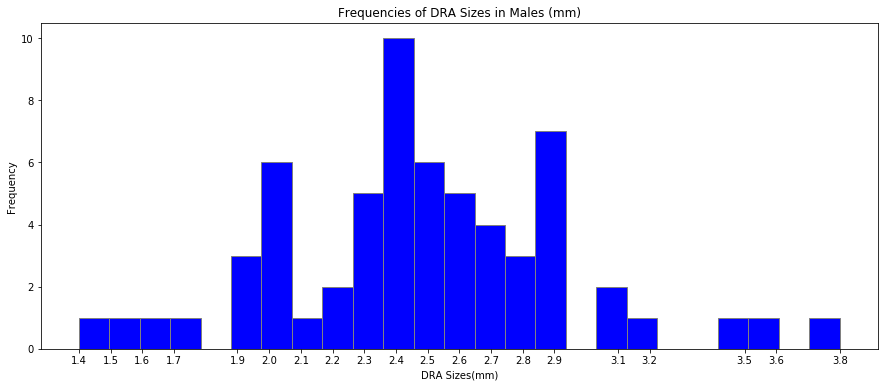

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

data = DRA_size_males_s
#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(data, facecolor='blue', edgecolor='gray', bins=25, rwidth=1.10, align='mid')

# Set the ticks to be at the edges of the bins.
bins=[1.4,1.5,1.6,1.7,1.9,2.0,2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3.1,3.2,3.5,3.6,3.8]  # 20 values
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
#ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

ax.set_ylabel('Frequency')
ax.set_xlabel('DRA Sizes(mm)')


ax.set_title('Frequencies of DRA Sizes in Males (mm)')

#plt.subplots_adjust(bottom=0.15)
#fig.tight_layout()

plt.savefig('/Users/swe03/Documents/FreqOfDRAsizesMales.png')   ## or .pdf 

plt.show()




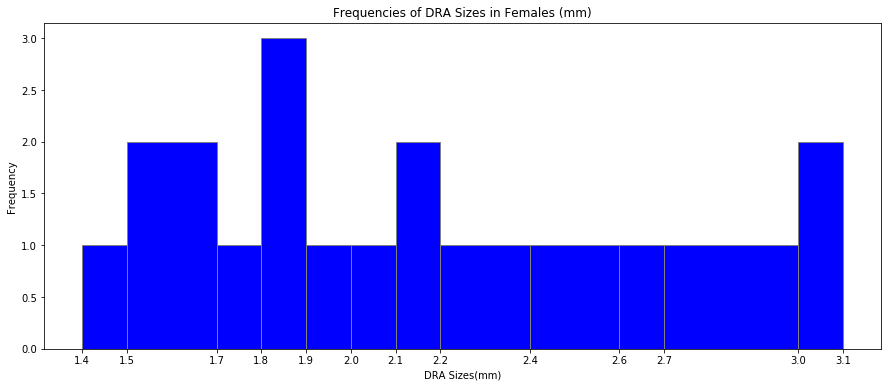

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

data = DRA_size_females_s
#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1)

bins=[1.4,1.5,1.7,1.8,1.9,2.,2.1,2.2,2.4,2.6,2.7,3.,3.1] 
ax.hist(data, facecolor='blue', edgecolor='gray', bins=bins, rwidth=1.10, align='mid')

# Set the ticks to be at the edges of the bins.
ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
#ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

ax.set_ylabel('Frequency')
ax.set_xlabel('DRA Sizes(mm)')


ax.set_title('Frequencies of DRA Sizes in Females (mm)')

#plt.subplots_adjust(bottom=0.15)
#fig.tight_layout()

#plt.savefig('/Users/swe03/Documents/FreqOfDRAsizesFemales.pdf')

plt.show()




In [43]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr


# Use scipy.stats.ttest_ind.
# Works with either the dataframe or the array created above

t, p = ttest_ind(DRA_size_fullpop_s, SRA_size_fullpop_s, equal_var=False)
print("ttest DRA vs SRA size full population:      t = %g  p = %g" % (t, p))

t, p = ttest_ind(DRA_size_females_s, DRA_size_males_s, equal_var=False)
print("ttest DRA size females vs males:            t = %g  p = %g" % (t, p))

t, p = ttest_ind(SRA_size_females_s, SRA_size_males_s, equal_var=False)
print("ttest SRA size females vs males:            t = %g  p = %g" % (t, p))


ttest DRA vs SRA size full population:      t = 0.157851  p = 0.874899
ttest DRA size females vs males:            t = -2.87226  p = 0.00827102
ttest SRA size females vs males:            t = -2.42612  p = 0.0283473


##### What follows are just some dev experiments #### 

In [45]:
np.savetxt("/Users/swe03/Documents/CathStudy/males_data1.csv", DRA_size_males_s, delimiter=",",fmt='%1.1f')

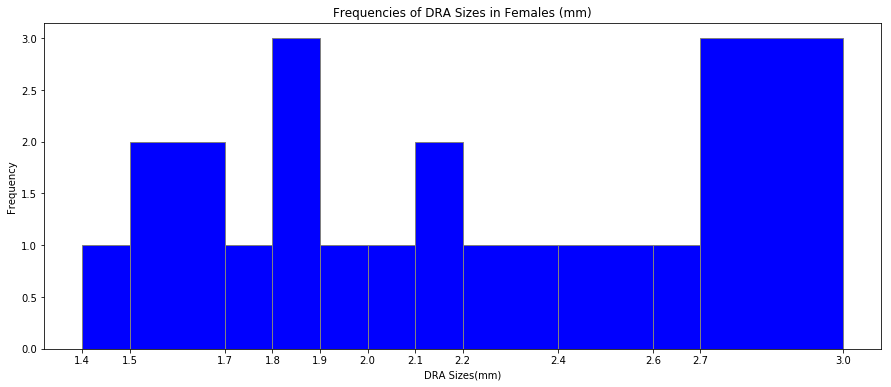

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

data = DRA_size_females_s
#fig, ax = plt.subplots()
fig, ax = plt.subplots(nrows=1, ncols=1)


# Set the ticks to be at the edges of the bins.
bins=[1.4,1.5,1.7,1.8,1.9,2.,2.1,2.2,2.4,2.6,2.7,3.] 

ax.hist(data, bins=bins, facecolor='blue', edgecolor='gray',  rwidth=1, align='mid')

ax.set_xticks(bins)

# Set the xaxis's tick labels to be formatted with 1 decimal place...
#ax.xaxis.set_major_formatter(FormatStrFormatter('%0.1f'))

ax.set_ylabel('Frequency')
ax.set_xlabel('DRA Sizes(mm)')


ax.set_title('Frequencies of DRA Sizes in Females (mm)')

#plt.subplots_adjust(bottom=0.15)
#fig.tight_layout()

#plt.savefig('/Users/swe03/Documents/FreqOfDRAsizesFemales.pdf')

plt.show()




In [100]:
DRA_size_females_s

array([[ 1.4],
       [ 1.5],
       [ 1.6],
       [ 1.7],
       [ 1.8],
       [ 1.8],
       [ 1.8],
       [ 1.9],
       [ 2. ],
       [ 2.1],
       [ 2.1],
       [ 2.2],
       [ 2.4],
       [ 2.6],
       [ 2.7],
       [ 3. ],
       [ 3. ]])